#### function for cell hiding

In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

#### libraries and scatter() function

In [10]:
e_data_sent.shape

(719, 19850)

In [9]:
#libraries
import numpy as np
from sklearn.decomposition import PCA
import time
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

#data loading and preparation
e0 = np.load("../processed_final_texts/neg_lemma.npy")
e1 = np.load("../processed_final_texts/pos_lemma.npy")
e0_sent = np.load("../processed_final_texts/neg_lemma_sent.npy")
e1_sent = np.load("../processed_final_texts/pos_lemma_sent.npy")
e_data = np.concatenate((e0,e1))
e_data_sent = np.concatenate((e0_sent,e1_sent))
labels = np.array([0] * 719)
labels[124:719] = 1 
e_data_sent =e_data_sent.reshape((719,19850))
e_data =e_data.reshape((719,39700))
hide_toggle()

## T-SNE

In [13]:
import time
time_start = time.time()
tsne_result1 = TSNE(random_state=0).fit_transform(e_data)
tsne_result2 = TSNE(random_state=0).fit_transform(e_data_sent)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

def prepare_data(tsne_data):
    test = pd.DataFrame(tsne_data)
    test["label"] = labels
    test["label"].replace({0:"non-empathic",1:"empathic"},inplace = True)
    test.rename(columns = {0:"x",1:"y"},inplace = True)
    groups = test.groupby('label')
    return groups

def plot(groups1,groups2):
    #fig, ax = 
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,
                           sharex=True, sharey=True,
                           figsize=(10,4))
    ax1.set_title('Wiki2Vec (d = 100)')
    ax2.set_title('Sentiment-specific embedding(d = 50)')
    ax1.grid(True)
    ax2.grid(True)
    fig.text(0.5, 0.04, 'tsne_1', ha='center', va='center')
    fig.text(0.06, 0.5, 'tsne_2', ha='center', va='center', rotation='vertical')
    for name, group in groups1:
        ax1.plot(group.x, group.y, 
                marker='.', 
                linestyle='', 
                ms=10,
                label = name,
                alpha = 0.7) 
    for name, group in groups2:
        #axes = plt.gca()
        #axes.set_xlim([-300,200])
        #axes.set_ylim([-150,300])
        ax2.plot(group.x, group.y, 
                marker='.', 
                linestyle='', 
                ms=10,
                label = name,
                alpha = 0.7)
        ax2.legend(loc="upper right")
    plt.savefig('tsne_plot.pdf')  
    plt.show()
    
#plot(prepare_data(tsne_result1),prepare_data(tsne_result2))

t-SNE done! Time elapsed: 53.498018980026245 seconds


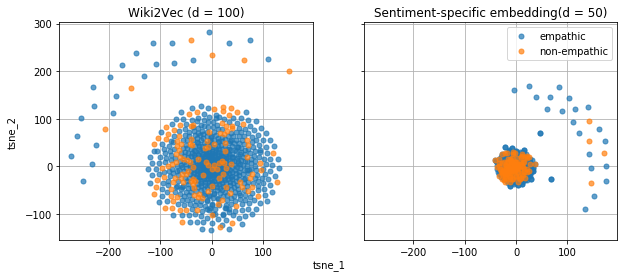

In [15]:
plot(prepare_data(tsne_result1),prepare_data(tsne_result2))

# Visualization of different training support sizes

In [52]:
import pandas as pd 
import numpy as np
data = pd.read_csv("../viz_data/support_viz_5_3.csv", sep = ";", decimal = ",")
data2 = pd.read_csv("../viz_data/support_viz_4_1.csv", sep = ";", decimal = ".")
data.index = np.arange(1, len(data) + 1)
data2.index = np.arange(1, len(data2) + 1)

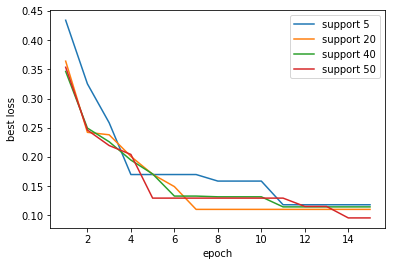

In [57]:
import matplotlib.pyplot as plt
def plot_graph(data):
    plt.plot(data.iloc[:,0], label = 'support 5')
    plt.plot(data.iloc[:,1], label = 'support 20')
    plt.plot(data.iloc[:,2], label = 'support 40')
    plt.plot(data.iloc[:,3], label = 'support 50')
    plt.ylabel('best loss')
    plt.xlabel('epoch')
    #plt.title('Model training with regards to training support size')
    plt.legend()
    #plt.savefig('train_sup_v5.pdf')
    plt.show()
    
plot_graph(data2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data2.iloc[:,0], label = 'support 5')
plt.plot(data2.iloc[:,1], label = 'support 20')
plt.plot(data2.iloc[:,2], label = 'support 40')
plt.plot(data2.iloc[:,3], label = 'support 50')
plt.ylabel('best loss')
plt.xlabel('epoch')
plt.title('Model training with regards to training support size')
plt.legend()
plt.show()

# Benchmarks

In [61]:
data = pd.read_csv("../viz_data/benchmark_results.csv", sep = ";")

In [64]:
print(data.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &             model &  precision &  recall &  accuracy \\
\midrule
0 &     CNN\_upsampled &      0.167 &   0.169 &     0.711 \\
1 &   SVMem\_upsampled &      0.211 &   0.032 &     0.812 \\
2 &  SVM300\_upsampled &      0.425 &   0.524 &     0.796 \\
3 &   NB300\_upsampled &      1.000 &   0.008 &     0.829 \\
4 &               KNN &      0.000 &   0.000 &     0.000 \\
\bottomrule
\end{tabular}

